In [439]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

from datetime import datetime

import quantstats as qs

In [440]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

In [441]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "dim_reduction"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [442]:
with open("./CSI500_factor_data.pkl", 'rb') as f:
    CSI500_factor_data = pickle.load(f)

CSI500_factor_data = CSI500_factor_data.swaplevel(0, 1, axis=0)
# CSI500_factor_data.index[0] = pd.to_datetime(CSI500_factor_data.index[0].values.astype(str))
CSI500_factor_data["layer"] = pd.qcut(CSI500_factor_data["FactorValue"], 10, labels=range(10))

factorDateList = list(CSI500_factor_data.index.levels[0])

CSI500_factor_data
for i in range(len(factorDateList)):
    factor_i = CSI500_factor_data.xs(factorDateList[i], level="TradingDate")
    factor_i = factor_i.sort_values("FactorValue", ascending=False)

factor_i["layer"] = pd.qcut(factor_i["FactorValue"], 10, labels=range(10))
factor_i



CSI500_factor_data[CSI500_factor_data["layer"] == 9]

CSI500_factor_data

FactorValue layer
TradingDate StockCode                   
20141231    000001.SZ     0.179599     6
            000002.SZ     0.075274     5
            000004.SZ    -0.345539     1
            000005.SZ    -0.143616     3
            000006.SZ     0.016844     5
...                            ...   ...
20211231    688668.SH     0.058465     5
            688699.SH     0.831264     9
            688777.SH     0.150947     6
            688788.SH     0.256817     7
            688981.SH     0.147202     6

[262418 rows x 2 columns]

In [443]:
with open("./price_data.pkl", 'rb') as f:
        price_data = pickle.load(f)

priceDateList = list(price_data.columns)
price_data = price_data.T
price_data.index = pd.to_datetime(price_data.index.values.astype(str))

price_data=price_data.pct_change().shift(-1)
price_data = price_data[:-1]
price_data



S_INFO_WINDCODE,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688786.SH,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH
2015-01-05,-0.149190,-0.136150,0.093162,0.000000,-0.094622,-0.001372,0.165878,-0.010036,0.000000,-0.086269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-02,0.029346,-0.008539,0.137016,0.000000,0.037455,-0.082063,0.082572,0.205938,0.000000,0.029402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-02,0.137569,0.074392,0.292240,0.000000,0.338317,0.486733,0.422464,0.146752,0.000000,0.263091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,0.252729,0.060498,0.021775,0.000000,0.282032,0.313839,0.000000,0.261703,0.000000,0.186683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-04,-0.037526,0.022682,0.403956,2.621579,0.465376,0.121909,0.000000,-0.061255,1.240562,0.359517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,0.042510,0.020173,0.031122,-0.080476,-0.008629,0.058598,0.035081,-0.300480,0.027020,0.002303,...,-0.181639,-0.255249,-0.212096,-0.083879,-0.030300,0.009951,-0.007704,-0.203414,-0.061801,-0.003573
2021-10-08,0.040235,-0.143597,-0.120986,-0.004475,-0.091711,0.059805,-0.084353,0.158825,0.055055,-0.138262,...,0.051153,-0.249313,0.019799,0.095959,-0.053888,-0.056453,-0.062629,0.251535,-0.017761,-0.007531
2021-11-01,-0.090256,0.015394,0.157218,0.027473,0.000000,0.326247,0.009048,-0.151706,-0.022397,0.002908,...,0.219716,0.398472,0.103793,0.241478,0.085652,0.105362,0.104638,0.422574,0.104372,-0.015357
2021-12-01,-0.055554,0.109367,0.025758,0.063199,0.088976,0.021373,0.347055,-0.194942,-0.025272,0.106573,...,-0.047260,0.134502,-0.055946,-0.187605,0.021045,-0.111149,0.037241,0.000383,-0.106528,-0.024954


In [444]:
result = np.zeros((85, 10))
for i in range(len(factorDateList)):
    factor_i = CSI500_factor_data.xs(factorDateList[i], level="TradingDate")
    factor_i.loc[:, "return"] = price_data.iloc[i, :]
    result[i] = factor_i["return"].groupby(factor_i["layer"]).mean()
result = pd.DataFrame(result, index=price_data.index, columns=range(1,11))





C:\Users\lizongcai\AppData\Local\Temp\ipykernel_116\793370421.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_i.loc[:, "return"] = price_data.iloc[i, :]
C:\Users\lizongcai\AppData\Local\Temp\ipykernel_116\793370421.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_i.loc[:, "return"] = price_data.iloc[i, :]
C:\Users\lizongcai\AppData\Local\Temp\ipykernel_116\793370421.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [445]:
with open("./benchmark.pkl", 'rb') as f:
        benchmark = pickle.load(f)

# benchmark["return"] = benchmark["000905.SH"].pct_change()
# benchmark["first_day"] = datetime(benchmark.index)
benchmarkDateList = list(benchmark.index)
benchmark['mask'] = False
for i in range(benchmark.shape[0]):
        benchmark["mask"][i] = benchmark.index[i] in priceDateList

C:\Users\lizongcai\AppData\Local\Temp\ipykernel_116\2778744380.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark["mask"][i] = benchmark.index[i] in priceDateList


In [446]:
benchmark =  benchmark[benchmark["mask"]]
benchmark['return'] = benchmark["000905.SH"].pct_change().shift(-1)
benchmark.dropna(inplace=True)

result["benchmark"] = np.array(benchmark["return"]).reshape(-1, 1)

result["long_short"] = result[10] - result["benchmark"]

result = (1+result).cumprod()


C:\Users\lizongcai\AppData\Local\Temp\ipykernel_116\504905952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark['return'] = benchmark["000905.SH"].pct_change().shift(-1)
C:\Users\lizongcai\AppData\Local\Temp\ipykernel_116\504905952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark.dropna(inplace=True)


In [447]:
# result["benchmark"] = np.array(benchmark["return"]).reshape(-1, 1)

# # result['date'] = pd.to_datetime(result.index, format='%YYYY%MM%DM')

result.index = pd.to_datetime(result.index.values.astype(str))

result

,1,2,3,4,5,6,7,8,9,10,benchmark,long_short
2015-01-05,1.033994,1.049978,1.030770,1.045797,1.050156,1.055443,1.055432,1.063184,1.082098,1.093339,1.035513,1.057826
2015-02-02,1.153859,1.140090,1.130751,1.151335,1.162725,1.174488,1.158031,1.173503,1.195131,1.208361,1.133427,1.069089
2015-03-02,1.397207,1.383322,1.345279,1.394807,1.432699,1.431123,1.426383,1.453520,1.485979,1.513980,1.370816,1.115568
2015-04-01,1.548152,1.612131,1.554842,1.602304,1.657976,1.644464,1.638316,1.740403,1.720510,1.789175,1.571064,1.155383
2015-05-04,1.961122,2.103553,2.012062,2.090981,2.119865,2.139756,2.139106,2.251461,2.331839,2.349275,1.936178,1.248564
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,0.369224,0.879450,1.145930,1.591694,1.641883,2.340036,2.786416,2.933327,3.549448,5.444911,1.309085,4.221312
2021-10-08,0.368068,0.861580,1.112764,1.571000,1.578408,2.287219,2.708503,2.858314,3.461037,5.305146,1.303440,4.131159
2021-11-01,0.401087,0.940908,1.214296,1.748578,1.728582,2.498421,2.960340,3.160970,3.820025,5.786224,1.342591,4.381692
2021-12-01,0.414703,0.964848,1.246496,1.805080,1.799562,2.618530,3.117500,3.303579,4.069653,5.982225,1.357658,4.480943


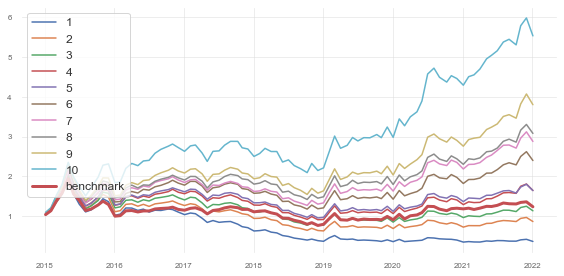

In [449]:
plt.figure(figsize=(8, 4))
for i in range(1, 11):
    plt.plot(result[i], label = str(i))

plt.plot(result['benchmark'], 'r-',linewidth=3, label = "benchmark")


plt.legend(loc="upper left")
# plt.legend(loc=)

save_fig("fencengceshi")
plt.show()

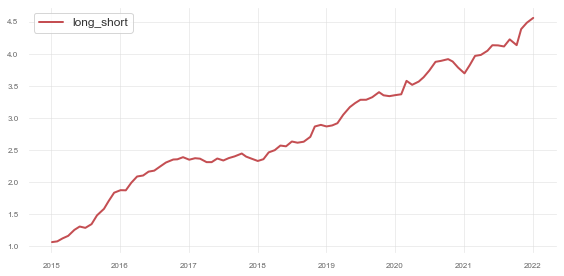

In [459]:
plt.figure(figsize=(8, 4))


plt.plot(result["long_short"], 'r-',linewidth=2, label = "long_short")


plt.legend(loc="upper left")

save_fig("对冲")
plt.show()

In [456]:
qs.stats.information_ratio(result["long_short"],benchmark=result['benchmark'])


0.15269909882026478

                           Strategy
-------------------------  ----------
Start Period               2015-01-05
End Period                 2022-01-04
Risk-Free Rate             0.0%
Time in Market             99.0%

Cumulative Return          330.7%
CAGR﹪                     23.19%

Sharpe                     10.57
Smart Sharpe               7.58
Sortino                    38.83
Smart Sortino              27.83
Sortino/√2                 27.45
Smart Sortino/√2           19.68
Omega                      6.76

Max Drawdown               -5.67%
Longest DD Days            241
Volatility (ann.)          42.12%
Calmar                     4.09
Skew                       0.79
Kurtosis                   0.58

Expected Daily %           1.73%
Expected Monthly %         1.73%
Expected Yearly %          20.02%
Kelly Criterion            62.88%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.6%
Expected Shortfall (cVaR)  -2.6%

Gain/Pain Ratio            5.76
Gain/Pain (1M)           

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-11-02,2021-01-04,2021-03-01,119,-5.668859,-3.365889
2,2017-11-01,2018-01-02,2018-03-01,120,-4.771660,-3.632697
3,2017-01-03,2017-05-02,2017-09-01,241,-3.245186,-3.240371
4,2021-10-08,2021-10-08,2021-11-01,24,-2.135672,0.000000
5,2019-11-01,2019-12-02,2020-03-02,122,-1.826619,-1.436106


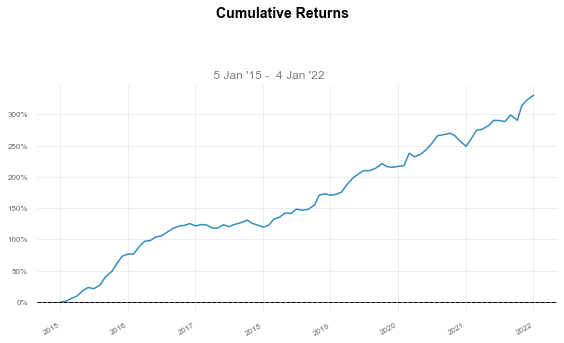

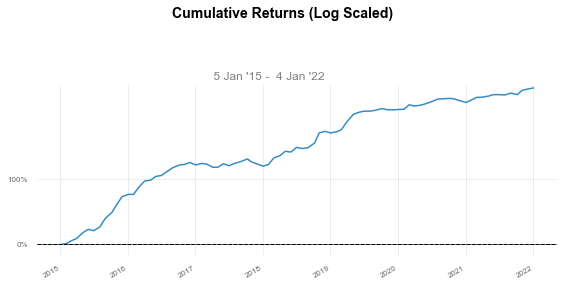

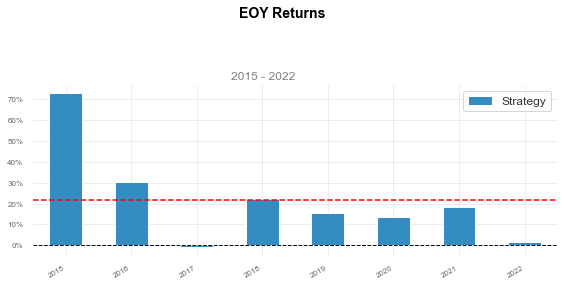

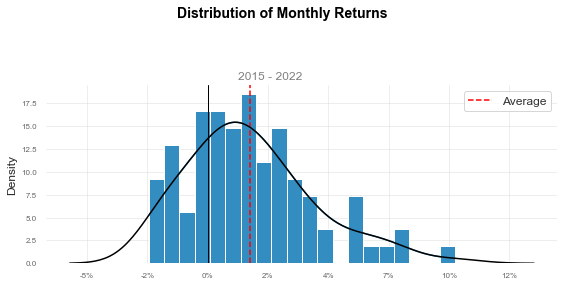

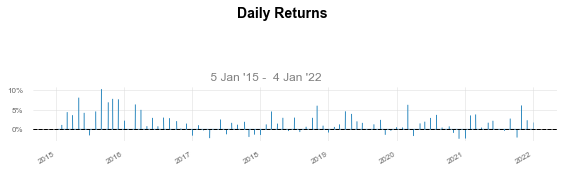

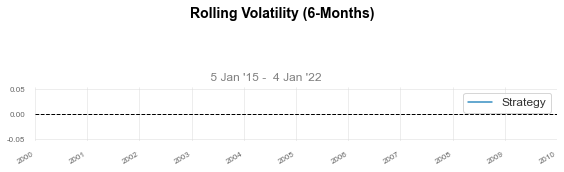

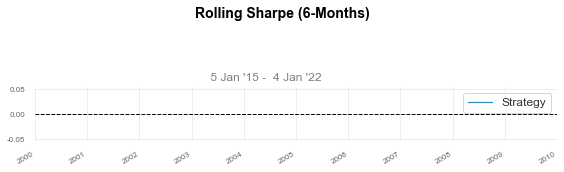

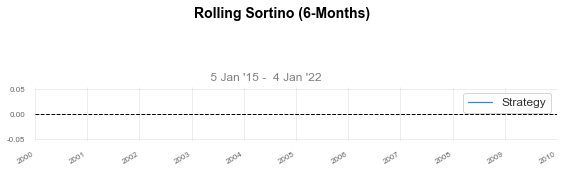

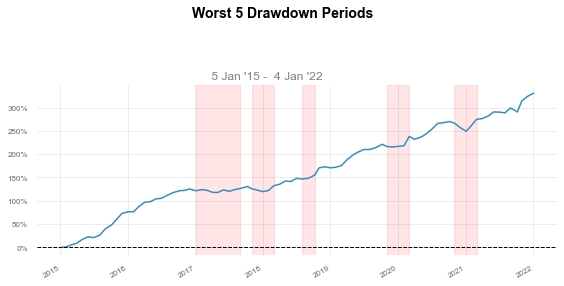

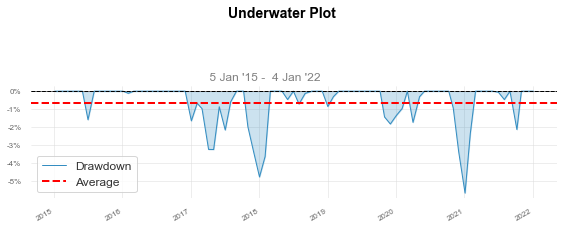

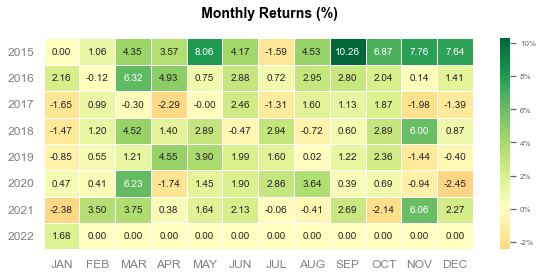

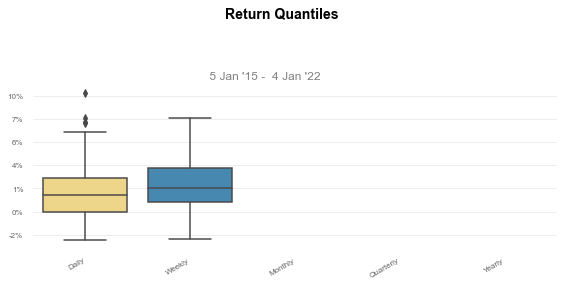

In [450]:
qs.reports.full(result["long_short"],rf=0.00,grayscale=False,display=True,compounded = True)

IndexError: index 2018 is out of bounds for axis 0 with size 85